Step  1: Loading and Inspecting the Data

In [ ]:
data <- read.csv("dataset.csv")  #
summary(data)


       x1              x3              x4               x5        
 Min.   : 1.81   Min.   :25.36   Min.   : 992.9   Min.   : 25.56  
 1st Qu.:13.51   1st Qu.:41.74   1st Qu.:1009.1   1st Qu.: 63.33  
 Median :20.34   Median :52.08   Median :1012.9   Median : 74.97  
 Mean   :19.65   Mean   :54.31   Mean   :1013.3   Mean   : 73.31  
 3rd Qu.:25.72   3rd Qu.:66.54   3rd Qu.:1017.3   3rd Qu.: 84.83  
 Max.   :37.11   Max.   :81.56   Max.   :1033.3   Max.   :100.16  
       x2       
 Min.   :420.3  
 1st Qu.:439.8  
 Median :451.6  
 Mean   :454.4  
 3rd Qu.:468.4  
 Max.   :495.8  

In [ ]:
# Inspect the structure of the dataset
str(data)

# Get summary statistics for all variables
summary(data)

# View the first 6 rows of the dataset
head(data)

# Calculate correlation matrix for all variables
cor(data)

# Optional: Correlation matrix for predictors only (exclude response variable)
predictors <- data[, c("x1", "x3", "x4", "x5")]  # Replace with actual predictor column names
cor(predictors)


'data.frame':	9568 obs. of  5 variables:
 $ x1: num  8.34 23.64 29.74 19.07 11.8 ...
 $ x3: num  40.8 58.5 56.9 49.7 40.7 ...
 $ x4: num  1011 1011 1007 1007 1017 ...
 $ x5: num  90 74.2 41.9 76.8 97.2 ...
 $ x2: num  480 446 439 453 464 ...


       x1              x3              x4               x5        
 Min.   : 1.81   Min.   :25.36   Min.   : 992.9   Min.   : 25.56  
 1st Qu.:13.51   1st Qu.:41.74   1st Qu.:1009.1   1st Qu.: 63.33  
 Median :20.34   Median :52.08   Median :1012.9   Median : 74.97  
 Mean   :19.65   Mean   :54.31   Mean   :1013.3   Mean   : 73.31  
 3rd Qu.:25.72   3rd Qu.:66.54   3rd Qu.:1017.3   3rd Qu.: 84.83  
 Max.   :37.11   Max.   :81.56   Max.   :1033.3   Max.   :100.16  
       x2       
 Min.   :420.3  
 1st Qu.:439.8  
 Median :451.6  
 Mean   :454.4  
 3rd Qu.:468.4  
 Max.   :495.8  

,x1,x3,x4,x5,x2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.34,40.77,1010.84,90.01,480.48
2,23.64,58.49,1011.40,74.20,445.75
3,29.74,56.90,1007.15,41.91,438.76
4,19.07,49.69,1007.22,76.79,453.09
5,11.80,40.66,1017.13,97.20,464.43
6,13.97,39.16,1016.05,84.60,470.96


,x1,x3,x4,x5,x2
x1,1.0000000,0.8441067,-0.50754934,-0.54253465,-0.9481285
x3,0.8441067,1.0000000,-0.41350216,-0.31218728,-0.8697803
x4,-0.5075493,-0.4135022,1.00000000,0.09957432,0.5184290
x5,-0.5425347,-0.3121873,0.09957432,1.00000000,0.3897941
x2,-0.9481285,-0.8697803,0.51842903,0.38979410,1.0000000


,x1,x3,x4,x5
x1,1.0000000,0.8441067,-0.50754934,-0.54253465
x3,0.8441067,1.0000000,-0.41350216,-0.31218728
x4,-0.5075493,-0.4135022,1.00000000,0.09957432
x5,-0.5425347,-0.3121873,0.09957432,1.00000000


Step 2: Prepareing Data for Analysis


In [ ]:
# Example: load from a CSV
data <- read.csv("dataset.csv")

# Create X and Y from columns (example with multiple predictors)
X <- data[, c("x1", "x3", "x4", "x5")]  # Select input features
Y <- data$x2  # Output variable


TASK 1 : Time Series Plots

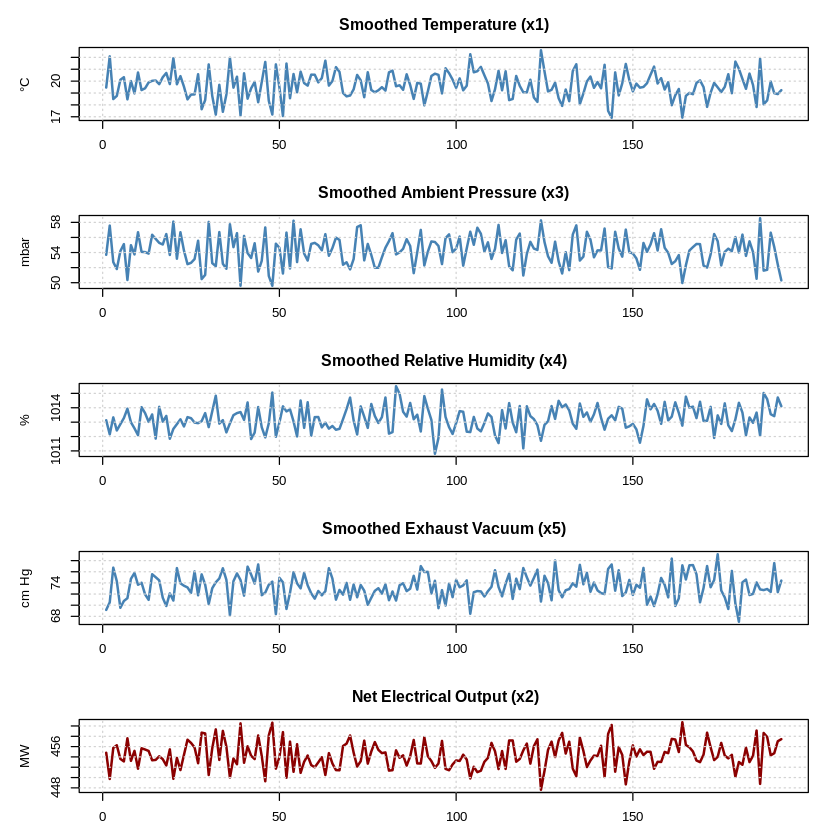

In [ ]:
# Helper function to block-average a vector
block_average <- function(vec, block_size = 100) {
  tapply(vec, (seq_along(vec) - 1) %/% block_size, mean)
}

# Apply block averaging to each variable
block_size <- 50
x1_avg <- block_average(data$x1, block_size)
x3_avg <- block_average(data$x3, block_size)
x4_avg <- block_average(data$x4, block_size)
x5_avg <- block_average(data$x5, block_size)
x2_avg <- block_average(data$x2, block_size)
time_avg <- seq_along(x1_avg)  # Averaged time index

# Set layout: 5 vertical plots
par(mfrow = c(5, 1), mar = c(3, 5, 3, 2))

# Define style
line_col <- "steelblue"
line_width <- 2

# Plot Temperature
plot(time_avg, x1_avg, type = "l", col = line_col, lwd = line_width,
     main = "Smoothed Temperature (x1)", xlab = "", ylab = "°C")
grid()

# Plot Ambient Pressure
plot(time_avg, x3_avg, type = "l", col = line_col, lwd = line_width,
     main = "Smoothed Ambient Pressure (x3)", xlab = "", ylab = "mbar")
grid()

# Plot Relative Humidity
plot(time_avg, x4_avg, type = "l", col = line_col, lwd = line_width,
     main = "Smoothed Relative Humidity (x4)", xlab = "", ylab = "%")
grid()

# Plot Exhaust Vacuum
plot(time_avg, x5_avg, type = "l", col = line_col, lwd = line_width,
     main = "Smoothed Exhaust Vacuum (x5)", xlab = "", ylab = "cm Hg")
grid()

# Plot Net Electrical Output
plot(time_avg, x2_avg, type = "l", col = "darkred", lwd = line_width,
     main = " Net Electrical Output (x2)", xlab = "Time Index (Averaged)", ylab = "MW")
grid()


In [ ]:

# Setting the start of the time series at time = 1 with equal intervals (frequency = 1)
X.ts <- ts(X, start = 1, frequency = 25)  # Converts input matrix X to a time series object
Y.ts <- ts(Y, start = 1, frequency = 25)  # Converts output matrix Y to a time series object


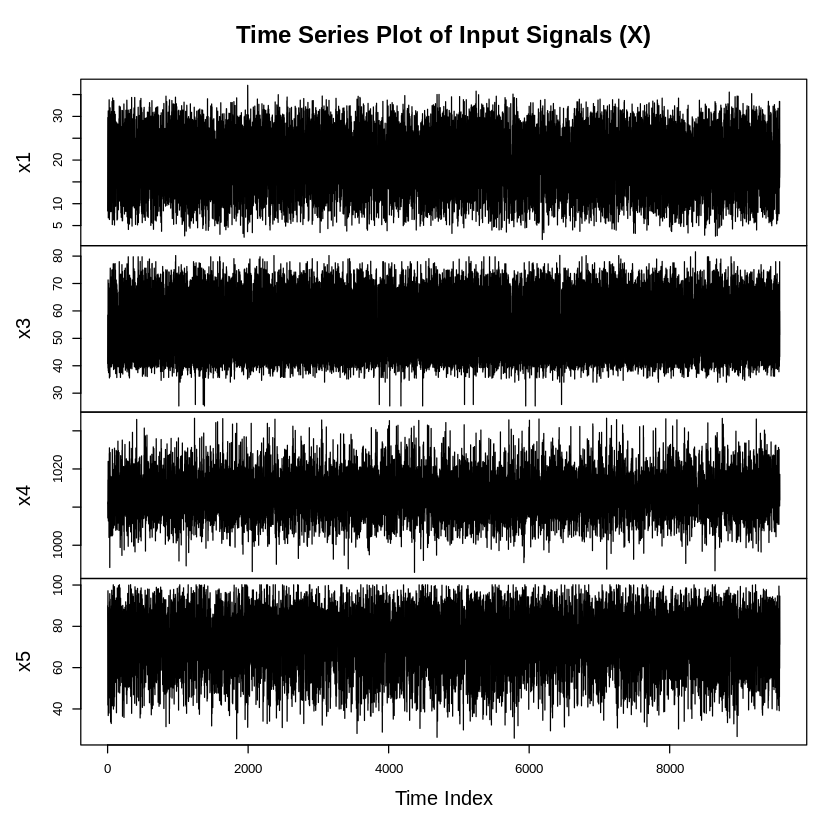

In [ ]:
# --- Step 1: Create a matrix of input variables (x1 to x5 excluding x2) ---
X_matrix <- as.matrix(data[, c("x1", "x3", "x4", "x5")])

# --- Step 2: Convert to multivariate time series object ---
X.ts <- ts(X_matrix)

# --- Step 3: Plot all input signals in one time series plot ---
plot(X.ts, main = "Time Series Plot of Input Signals (X)",
     xlab = "Time Index", ylab = "Input Signal Values", col = 1:4)


Task 1:  Distribution Plots

This section visualizes the distribution of each input and output variable.Helps identify whether each variable is normally distributed, skewed, or multimodal


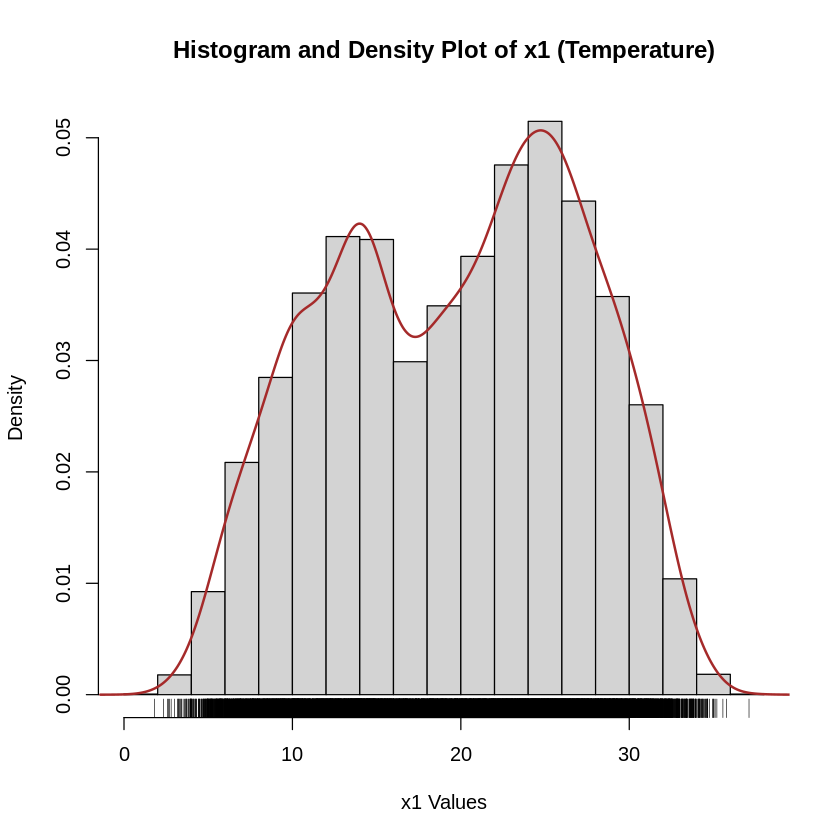

In [ ]:
# Plot histogram and density for input variable x1 (Temperature)
density_x1 <- density(data$x1)  # Computes the kernel density of x1
hist(data$x1, freq = FALSE, main = "Histogram and Density Plot of x1 (Temperature)",
     xlab = "x1 Values")
lines(density_x1, lwd = 2, col = "brown")  # Overlays density curve on histogram
rug(jitter(data$x1))  # Adds jittered data points along x-axis


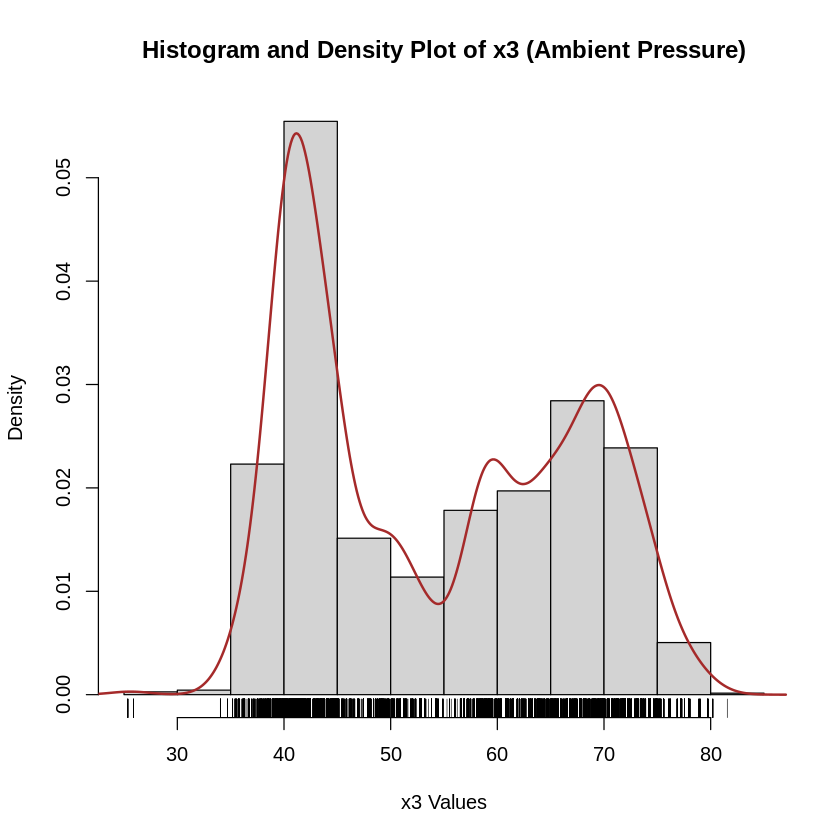

In [ ]:
# Plot histogram and density for input variable x3 (Ambient Pressure)
density_x3 <- density(data$x3)
hist(data$x3, freq = FALSE, main = "Histogram and Density Plot of x3 (Ambient Pressure)",
     xlab = "x3 Values")
lines(density_x3, lwd = 2, col = "brown")
rug(jitter(data$x3))

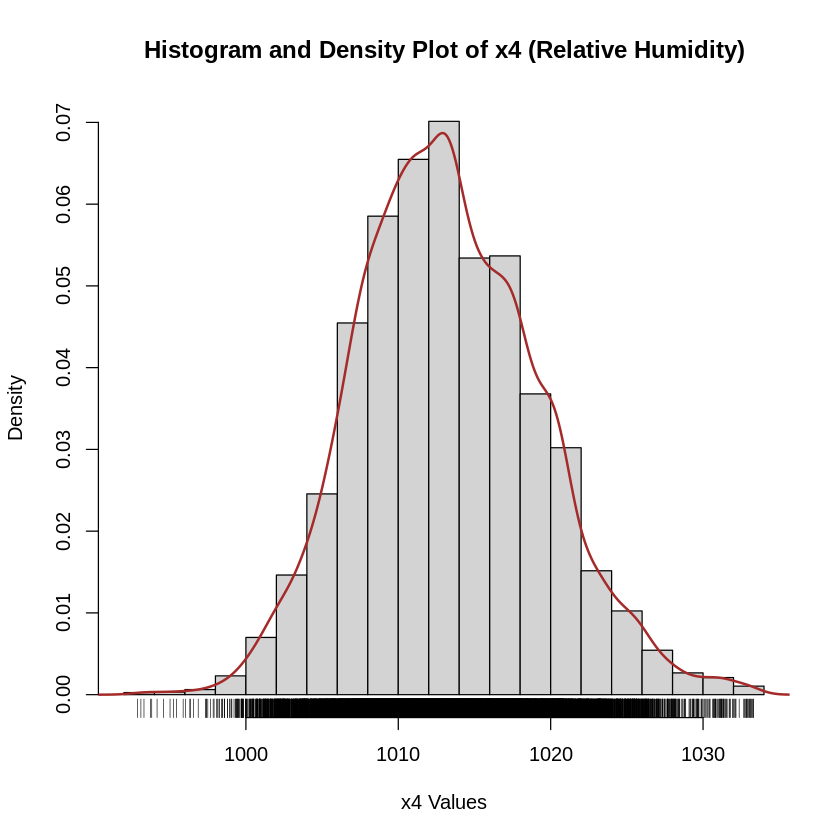

In [ ]:
# Plot histogram and density for input variable x4 (Relative Humidity)
density_x4 <- density(data$x4)
hist(data$x4, freq = FALSE, main = "Histogram and Density Plot of x4 (Relative Humidity)",
     xlab = "x4 Values")
lines(density_x4, lwd = 2, col = "brown")
rug(jitter(data$x4))

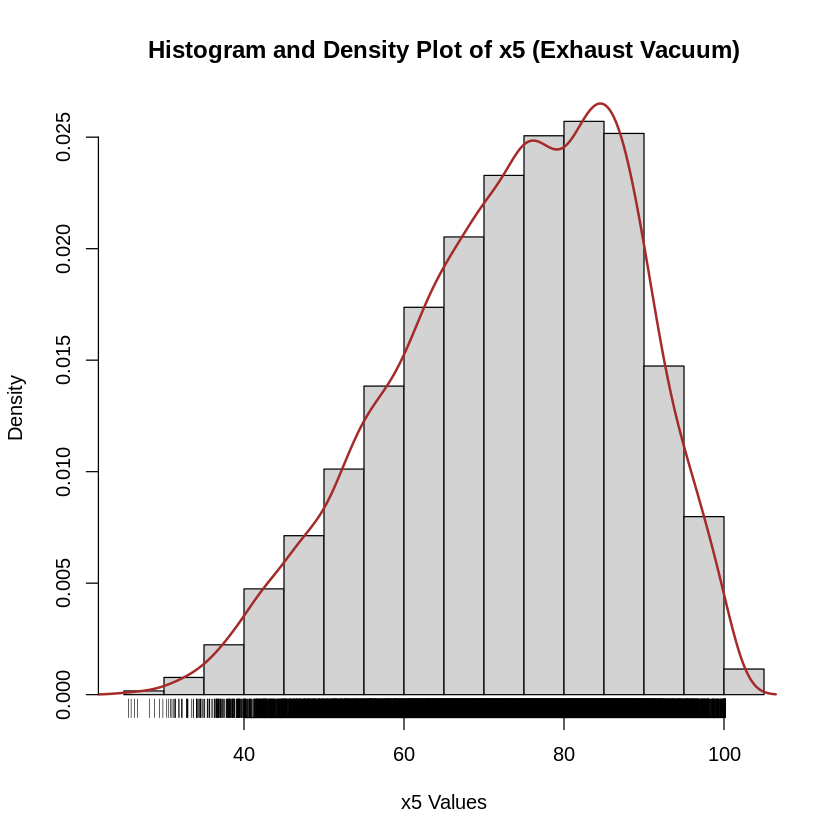

In [ ]:
# Plot histogram and density for input variable x5 (Exhaust Vacuum)
density_x5 <- density(data$x5)
hist(data$x5, freq = FALSE, main = "Histogram and Density Plot of x5 (Exhaust Vacuum)",
     xlab = "x5 Values")
lines(density_x5, lwd = 2, col = "brown")
rug(jitter(data$x5))

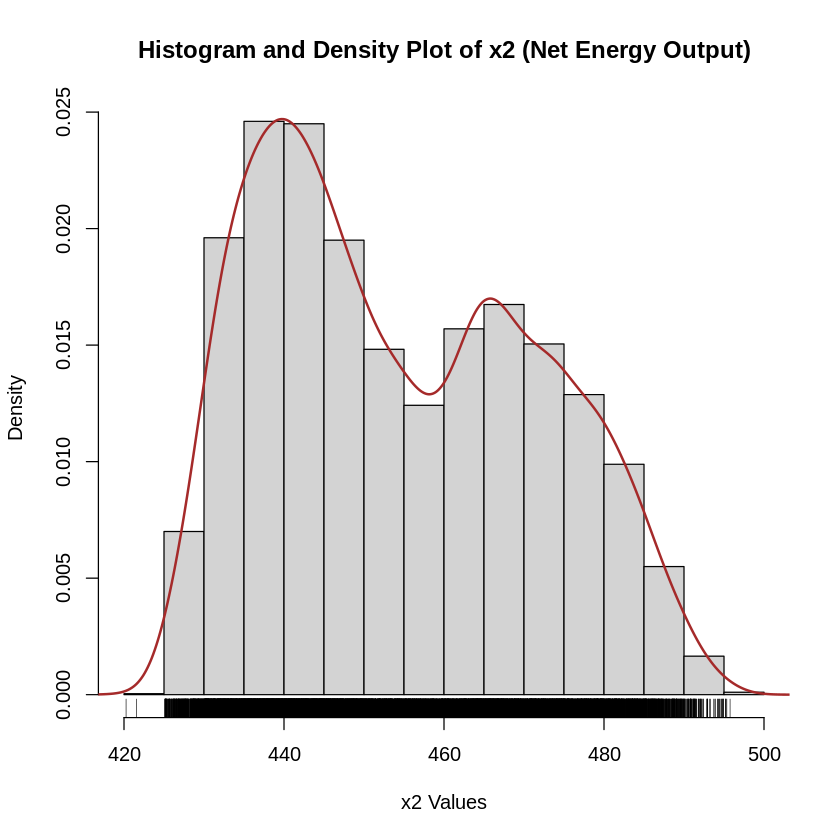

In [ ]:
# Plot histogram and density for output variable x2 (Net Energy Output)
density_x2 <- density(data$x2)
hist(data$x2, freq = FALSE, main = "Histogram and Density Plot of x2 (Net Energy Output)",
     xlab = "x2 Values")
lines(density_x2, lwd = 2, col = "brown")
rug(jitter(data$x2))

Task 1:  Correlation Matrix

Loading required package: corrplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘corrplot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



      x1    x3    x4    x5    x2
x1  1.00  0.84 -0.51 -0.54 -0.95
x3  0.84  1.00 -0.41 -0.31 -0.87
x4 -0.51 -0.41  1.00  0.10  0.52
x5 -0.54 -0.31  0.10  1.00  0.39
x2 -0.95 -0.87  0.52  0.39  1.00


corrplot 0.95 loaded



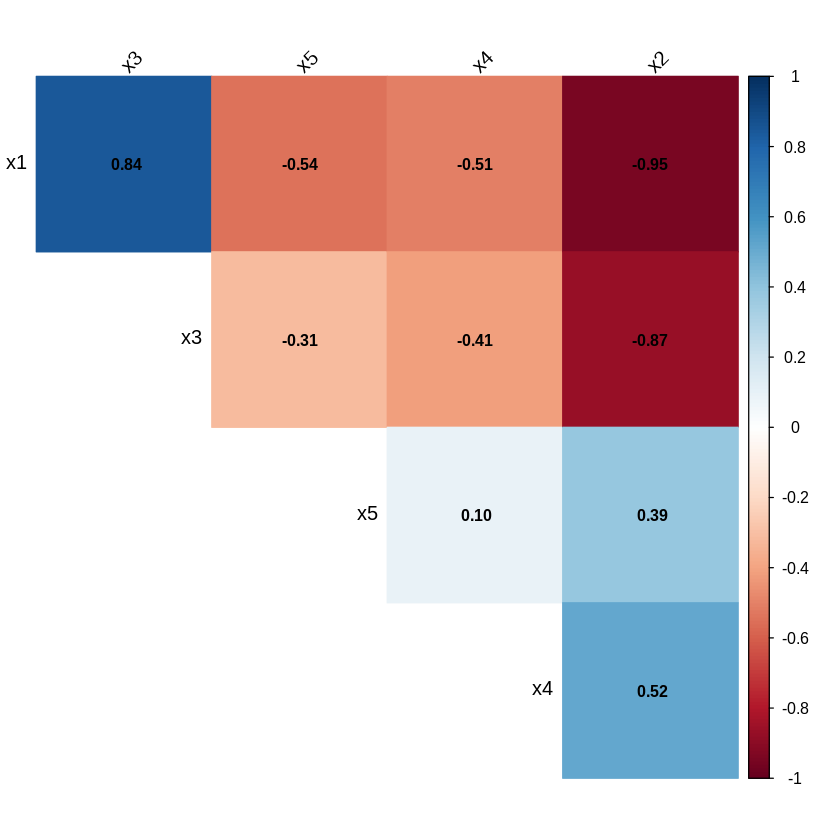

In [ ]:
# Step 1: Compute correlation matrix of all variables in the dataset
cor_matrix <- cor(data)
if (!require(corrplot)) install.packages("corrplot")
# Step 2: Print the correlation matrix with rounded values for easier reading
print(round(cor_matrix, 2))

# Step 3: Visualize the correlation matrix using heatmap with enhanced colors and labels
library(corrplot)

# Compute correlation matrix
cor_matrix <- cor(data)

# Plot correlation matrix with numbers
corrplot(cor_matrix,
         method = "color",        # colored squares
         type = "upper",          # upper triangle only
         order = "hclust",        # cluster order for better grouping
         addCoef.col = "black",   # add correlation coefficients in black
         tl.col = "black",        # variable labels color
         tl.srt = 45,             # label rotation
         number.cex = 0.8,        # size of numbers
         diag = FALSE)            # hide diagonal values


 Task 1 Scatter Plot

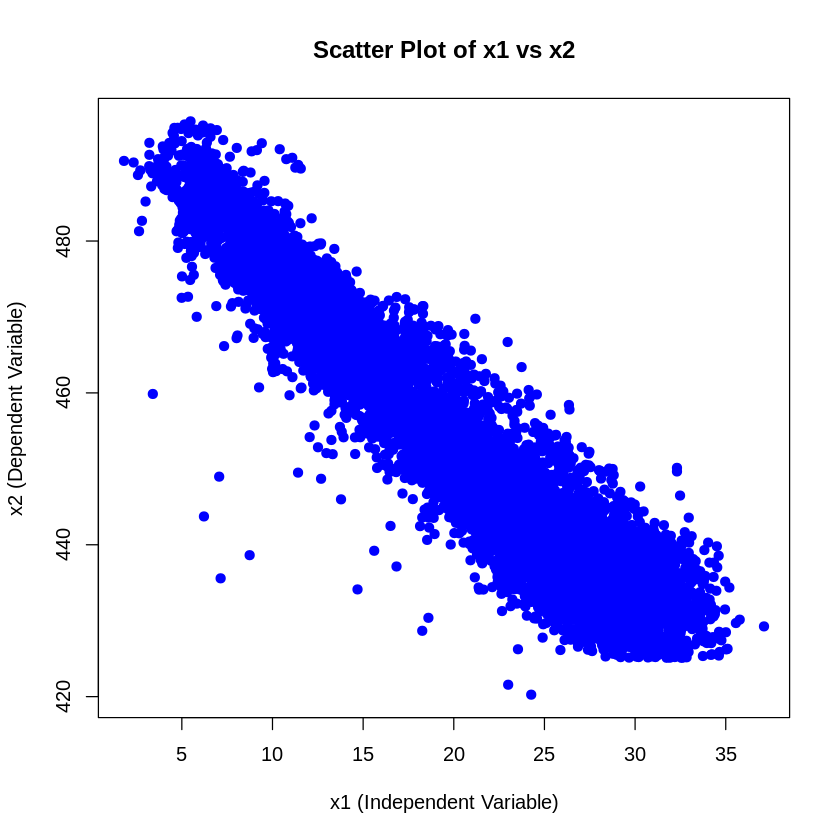

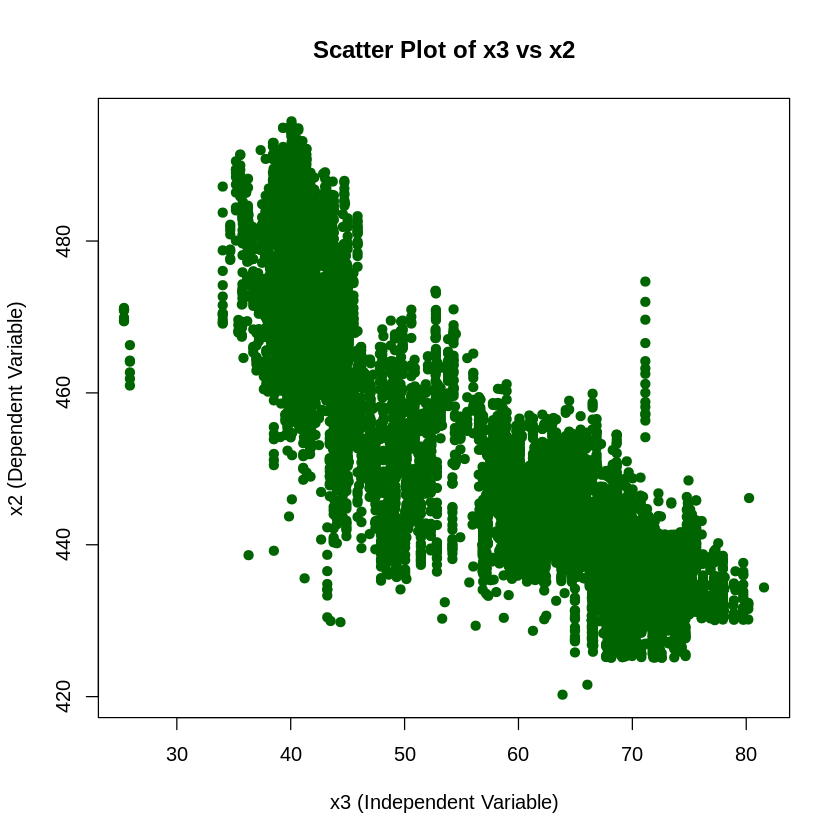

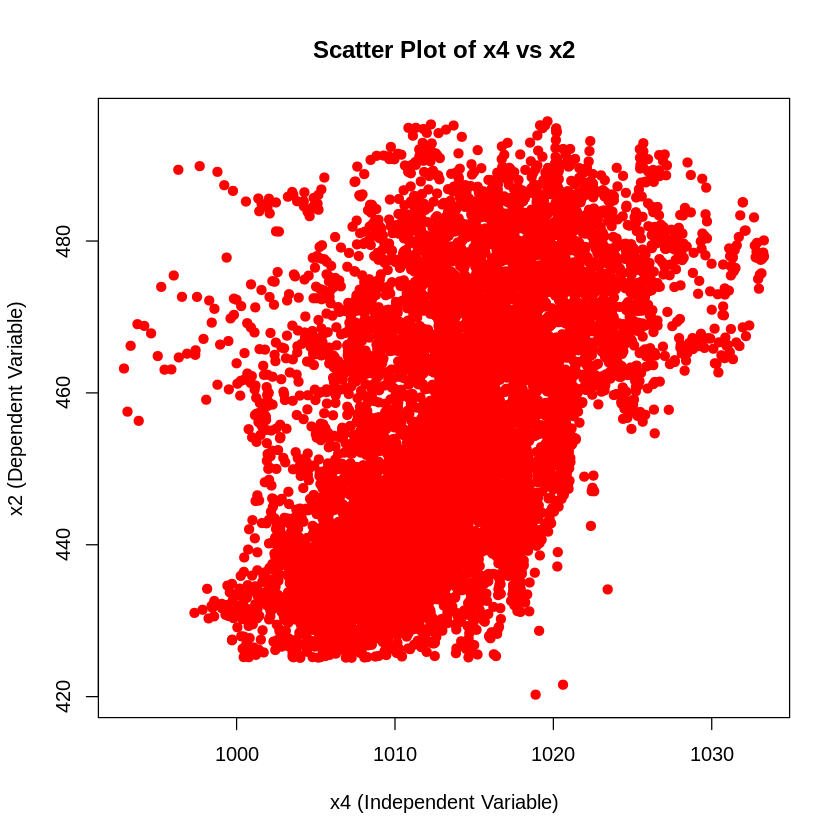

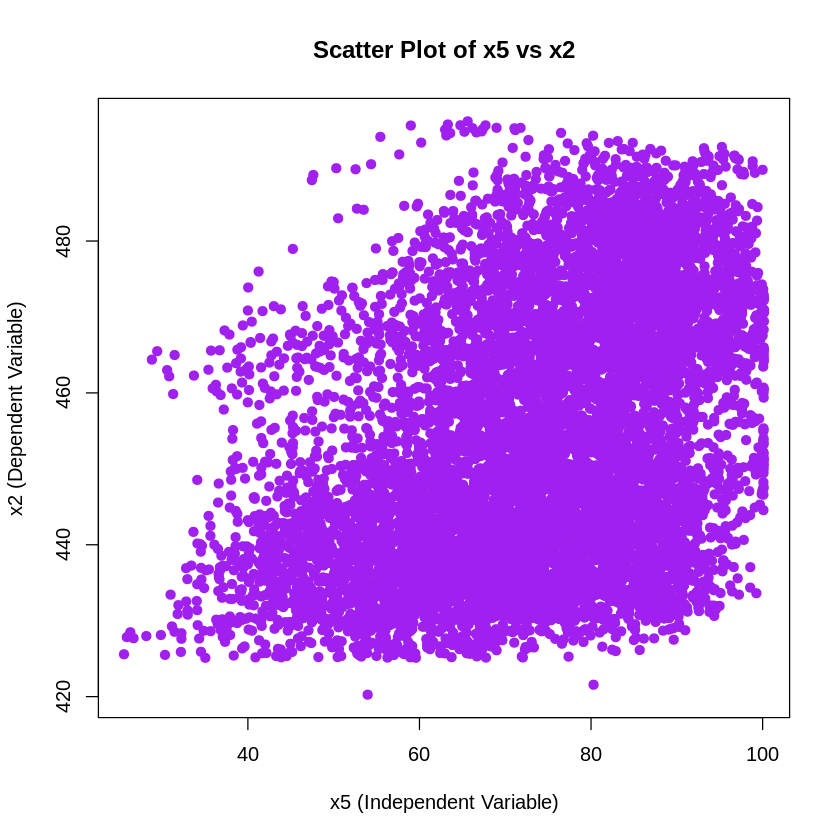

In [ ]:
# Step 1: Plot scatter plot of x1 vs dependent variable x2
plot(data$x1, data$x2,
     main = "Scatter Plot of x1 vs x2",
     xlab = "x1 (Independent Variable)",
     ylab = "x2 (Dependent Variable)",
     pch = 19, col = "blue")

# Step 2: Plot scatter plot of x3 vs dependent variable x2
plot(data$x3, data$x2,
     main = "Scatter Plot of x3 vs x2",
     xlab = "x3 (Independent Variable)",
     ylab = "x2 (Dependent Variable)",
     pch = 19, col = "darkgreen")

# Step 3: Plot scatter plot of x4 vs dependent variable x2
plot(data$x4, data$x2,
     main = "Scatter Plot of x4 vs x2",
     xlab = "x4 (Independent Variable)",
     ylab = "x2 (Dependent Variable)",
     pch = 19, col = "red")

# Step 4: Plot scatter plot of x5 vs dependent variable x2
plot(data$x5, data$x2,
     main = "Scatter Plot of x5 vs x2",
     xlab = "x5 (Independent Variable)",
     ylab = "x2 (Dependent Variable)",
     pch = 19, col = "purple")


# New section

Task 2: Regression

Task 2.1


In [ ]:
# --- Load Data ---
data <- read.csv("dataset.csv")

# --- Define Target Variable ---
y_response <- data$x2

# --- Define 5 Polynomial Model Definitions  ---
model_definitions <- list(
  model1 = data.frame(x4 = data$x4, x3_sq = data$x3^2),
  model2 = data.frame(x4 = data$x4, x3_sq = data$x3^2, x5 = data$x5),
  model3 = data.frame(x3 = data$x3, x4 = data$x4, x5_cubed = data$x5^3),
  model4 = data.frame(x4 = data$x4, x3_sq = data$x3^2, x5_cubed = data$x5^3),
  model5 = data.frame(x4 = data$x4, x1_sq = data$x1^2, x3_sq = data$x3^2)
)

# --- OLS Estimator Function (θ̂ = (XᵀX)^(-1)Xᵀy) ---
estimate_theta_ols_scaled <- function(X_scaled, y, lambda_val = 0) {
  n <- nrow(X_scaled)
  X_with_intercept <- cbind(Intercept = 1, X_scaled)
  XtX <- t(X_with_intercept) %*% X_with_intercept
  Xty <- t(X_with_intercept) %*% y
  solve(XtX + lambda_val * diag(ncol(XtX)), Xty)  # Add lambda for numerical stability
}

# --- Initialize Lists to Store Results ---
theta_list_all_models <- list()
X_final_processed_list_all_models <- list()

# --- Process Each Model ---
for (model_name in names(model_definitions)) {
  cat("\nProcessing:", model_name, "\n")

  X_raw_df <- model_definitions[[model_name]]

  # Step 1: Convert to matrix
  X_raw_mat <- as.matrix(X_raw_df)

  # Step 2: Standardize (mean = 0, sd = 1)
  if (ncol(X_raw_mat) > 0) {
    colnames(X_raw_mat) <- colnames(X_raw_df)
    X_scaled <- scale(X_raw_mat)
    X_scaled[is.na(X_scaled)] <- 0  # Handle any constant predictor
  } else {
    X_scaled <- matrix(nrow = nrow(X_raw_mat), ncol = 0)
  }

  # Step 3: Estimate θ̂
  theta_hat <- estimate_theta_ols_scaled(X_scaled, y_response)
  theta_list_all_models[[model_name]] <- theta_hat

  # Step 4: Save final processed X (with intercept)
  if (ncol(X_scaled) > 0) {
    X_final_processed <- cbind("(Intercept)" = 1, X_scaled)
  } else {
    X_final_processed <- matrix(1, nrow = nrow(X_scaled), ncol = 1)
    colnames(X_final_processed) <- "(Intercept)"
  }
  X_final_processed_list_all_models[[model_name]] <- X_final_processed

  # Print Output
  cat("Estimated θ̂:\n")
  print(theta_hat)
}



Processing: model1 
Estimated θ̂:
                [,1]
Intercept 454.365009
x4          3.348278
x3_sq     -13.211452

Processing: model2 
Estimated θ̂:
                [,1]
Intercept 454.365009
x4          3.432657
x3_sq     -12.406622
x5          2.517326

Processing: model3 
Estimated θ̂:
                [,1]
Intercept 454.365009
x3        -12.722943
x4          3.402683
x5_cubed    2.315840

Processing: model4 
Estimated θ̂:
                [,1]
Intercept 454.365009
x4          3.487220
x3_sq     -12.402038
x5_cubed    2.487015

Processing: model5 
Estimated θ̂:
                [,1]
Intercept 454.365009
x4          1.349107
x1_sq     -10.605331
x3_sq      -5.173124


In [ ]:
# --- Initialize Lists to Store Results ---
predictions_all_models <- list()
residuals_all_models <- list()

# --- Loop Over Each Model ---
for (model_name in names(theta_list_all_models)) {
  cat("\nProcessing:", model_name, "\n")

  theta_hat <- theta_list_all_models[[model_name]]
  X_final <- X_final_processed_list_all_models[[model_name]]

  # Skip model if theta or X is missing
  if (is.null(theta_hat) || any(is.na(theta_hat)) || is.null(X_final)) {
    predictions_all_models[[model_name]] <- NA
    residuals_all_models[[model_name]] <- NA
    next
  }

  # Step 1: Make Predictions ŷ = X * θ̂
  y_pred <- X_final %*% theta_hat
  predictions_all_models[[model_name]] <- y_pred

  # Step 2: Compute Residuals e = y - ŷ
  residuals <- y_response - y_pred
  residuals_all_models[[model_name]] <- residuals

  # Show output
  cat("First 5 predictions:\n")
  print(round(head(y_pred), 2))
  cat("First 5 residuals:\n")
  print(round(head(residuals), 2))
}



Processing: model1 
First 5 predictions:
       [,1]
[1,] 466.51
[2,] 450.42
[3,] 449.74
[4,] 456.94
[5,] 470.13
[6,] 470.64
First 5 residuals:
       [,1]
[1,]  13.97
[2,]  -4.67
[3,] -10.98
[4,]  -3.85
[5,]  -5.70
[6,]   0.32

Processing: model2 
First 5 predictions:
       [,1]
[1,] 468.53
[2,] 450.73
[3,] 444.31
[4,] 457.09
[5,] 473.48
[6,] 471.73
First 5 residuals:
      [,1]
[1,] 11.95
[2,] -4.98
[3,] -5.55
[4,] -4.00
[5,] -9.05
[6,] -0.77

Processing: model3 
First 5 predictions:
       [,1]
[1,] 469.46
[2,] 448.80
[3,] 444.57
[4,] 455.66
[5,] 475.09
[6,] 472.81
First 5 residuals:
       [,1]
[1,]  11.02
[2,]  -3.05
[3,]  -5.81
[4,]  -2.57
[5,] -10.66
[6,]  -1.85

Processing: model4 
First 5 predictions:
       [,1]
[1,] 468.77
[2,] 450.22
[3,] 445.69
[4,] 456.58
[5,] 474.59
[6,] 471.61
First 5 residuals:
       [,1]
[1,]  11.71
[2,]  -4.47
[3,]  -6.93
[4,]  -3.49
[5,] -10.16
[6,]  -0.65

Processing: model5 
First 5 predictions:
       [,1]
[1,] 472.69
[2,] 448.53
[3,] 436.34
[

2.2 RSS

In [ ]:
# --- Initialize lists to store RSS and variance ---
rss_all_models <- list()
residual_variance_all_models <- list()

n <- length(y_response)  # total number of observations

# --- Loop over each model ---
for (model_name in names(residuals_all_models)) {
  cat("\nProcessing:", model_name, "\n")

  residuals <- residuals_all_models[[model_name]]
  X_final <- X_final_processed_list_all_models[[model_name]]

  # Skip if data is missing
  if (is.null(residuals) || any(is.na(residuals)) || is.null(X_final)) {
    rss_all_models[[model_name]] <- NA
    residual_variance_all_models[[model_name]] <- NA
    next
  }

  # Step 1: Compute RSS = sum of squared residuals
  rss <- sum(residuals^2)
  rss_all_models[[model_name]] <- rss

  # Step 2: Compute σ² = RSS / (n - p), p = number of parameters
  p <- ncol(X_final)  # includes intercept
  sigma_sq <- rss / (n - p)
  residual_variance_all_models[[model_name]] <- sigma_sq

  # Output
  cat("RSS:", round(rss, 2), "\n")
  cat("Residual Variance (σ²):", round(sigma_sq, 4), "\n")
}




Processing: model1 
RSS: 657248.2 
Residual Variance (σ²): 68.7139 

Processing: model2 
RSS: 602347.1 
Residual Variance (σ²): 62.9807 

Processing: model3 
RSS: 547491.6 
Residual Variance (σ²): 57.245 

Processing: model4 
RSS: 603630.7 
Residual Variance (σ²): 63.1149 

Processing: model5 
RSS: 365625 
Residual Variance (σ²): 38.2293 


2.3 and 2.4 likelihood and AIC BIC

In [ ]:
# Initialize vectors to store results
log_likelihood_all_models <- numeric(length(residuals_all_models))
aic_all_models <- numeric(length(residuals_all_models))
bic_all_models <- numeric(length(residuals_all_models))

names(log_likelihood_all_models) <- names(residuals_all_models)
names(aic_all_models) <- names(residuals_all_models)
names(bic_all_models) <- names(residuals_all_models)

n <- length(y_response)  # number of observations

for (model_name in names(residuals_all_models)) {
  residuals <- residuals_all_models[[model_name]]
  X_final <- X_final_processed_list_all_models[[model_name]]

  if (is.null(residuals) || any(is.na(residuals)) || is.null(X_final)) {
    log_likelihood_all_models[model_name] <- NA
    aic_all_models[model_name] <- NA
    bic_all_models[model_name] <- NA
    next
  }

  rss <- sum(residuals^2)
  p <- ncol(X_final)

  # Residual variance
  sigma_sq <- rss / (n - p)

  # Log-likelihood (Normal residuals assumption)
  logL <- - (n / 2) * log(2 * pi) - (n / 2) * log(sigma_sq) - (rss / (2 * sigma_sq))

  # Calculate AIC and BIC
  aic <- 2 * p - 2 * logL
  bic <- p * log(n) - 2 * logL

  # Store values
  log_likelihood_all_models[model_name] <- logL
  aic_all_models[model_name] <- aic
  bic_all_models[model_name] <- bic

  # Print results
  cat("\nModel:", model_name, "\n")
  cat("Log-Likelihood:", round(logL, 2), "\n")
  cat("AIC:", round(aic, 2), "\n")
  cat("BIC:", round(bic, 2), "\n")
}



Model: model1 
Log-Likelihood: -33810.99 
AIC: 67627.98 
BIC: 67649.48 

Model: model2 
Log-Likelihood: -33393.69 
AIC: 66795.38 
BIC: 66824.05 

Model: model3 
Log-Likelihood: -32936.88 
AIC: 65881.77 
BIC: 65910.43 

Model: model4 
Log-Likelihood: -33403.88 
AIC: 66815.75 
BIC: 66844.42 

Model: model5 
Log-Likelihood: -31005.4 
AIC: 62018.79 
BIC: 62047.46 


Q_Q plot

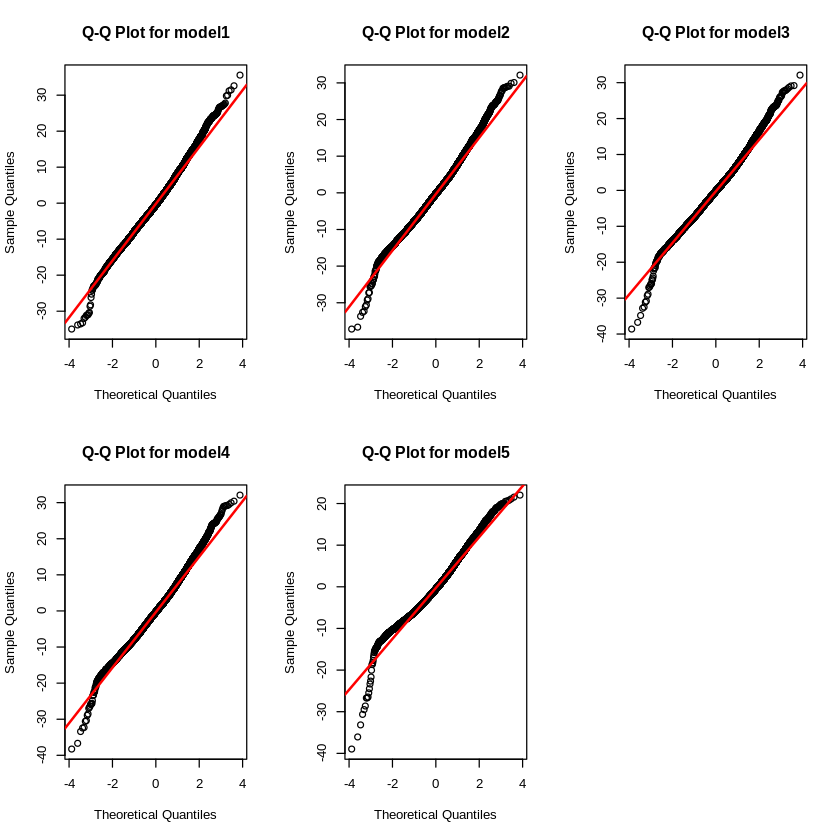

In [ ]:
# Loop through each model residuals and plot Q-Q plots
par(mfrow = c(2, 3))  # Arrange plots in grid for better comparison

for (model_name in names(residuals_all_models)) {
  residuals <- residuals_all_models[[model_name]]

  if (is.null(residuals) || any(is.na(residuals))) {
    next
  }

  qqnorm(residuals, main = paste("Q-Q Plot for", model_name))
  qqline(residuals, col = "red", lwd = 2)
}

par(mfrow = c(1, 1))  # Reset plotting layout


In [ ]:
aic_values <- numeric(length(theta_list_all_models))
bic_values <- numeric(length(theta_list_all_models))
names(aic_values) <- names(theta_list_all_models)
names(bic_values) <- names(theta_list_all_models)

for (model_name in names(theta_list_all_models)) {
  residuals <- residuals_all_models[[model_name]]
  n <- length(residuals)
  k <- length(theta_list_all_models[[model_name]])

  rss <- sum(residuals^2)
  sigma2 <- rss / n
  logL <- -n/2 * (log(2*pi*sigma2) + 1)

  aic_values[model_name] <- 2*k - 2*logL
  bic_values[model_name] <- k*log(n) - 2*logL
}

print(aic_values)
print(bic_values)


  model1   model2   model3   model4   model5 
67627.98 66795.38 65881.77 66815.75 62018.79 
  model1   model2   model3   model4   model5 
67649.48 66824.05 65910.43 66844.42 62047.46 


In [ ]:
build_model_matrix <- function(data, model_name) {
  # Example for your models - customize as per your model_definitions

  if (model_name == "model1") {
    # e.g., model1 predictors: x4, x3 squared
    data$x3_sq <- data$x3^2
    X <- data[, c("x4", "x3_sq")]
  } else if (model_name == "model2") {
    data$x3_sq <- data$x3^2
    X <- data[, c("x4", "x3_sq", "x5")]
  } else if (model_name == "model3") {
    data$x5_cubed <- data$x5^3
    X <- data[, c("x3", "x4", "x5_cubed")]
  } else if (model_name == "model4") {
    data$x3_sq <- data$x3^2
    data$x5_cubed <- data$x5^3
    X <- data[, c("x4", "x3_sq", "x5_cubed")]
  } else if (model_name == "model5") {
    data$x1_sq <- data$x1^2
    data$x3_sq <- data$x3^2
    X <- data[, c("x4", "x1_sq", "x3_sq")]
  } else {
    stop("Unknown model")
  }

  return(as.matrix(X))
}


2.7


Model: model1 - Test MSE: 68.22827 
Model: model2 - Test MSE: 63.44128 


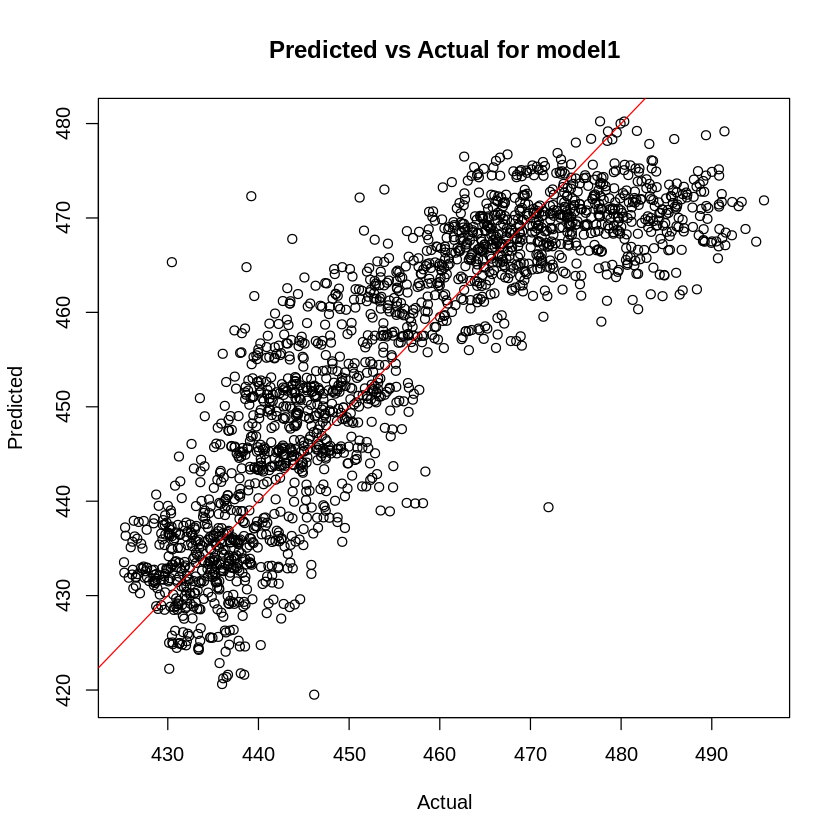

Model: model3 - Test MSE: 57.63059 


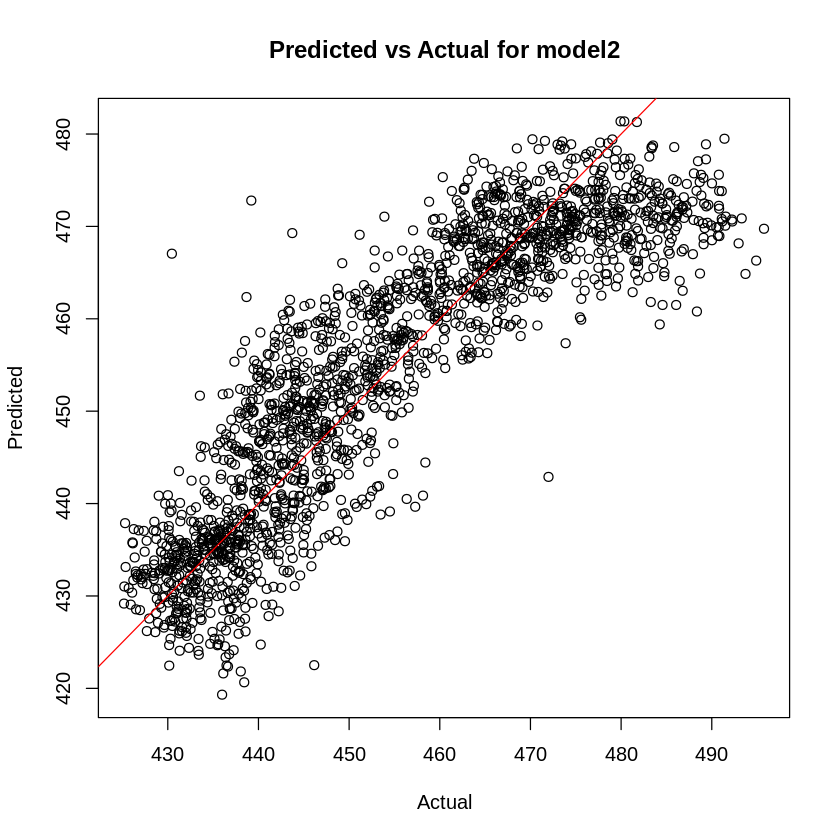

Model: model4 - Test MSE: 63.48574 


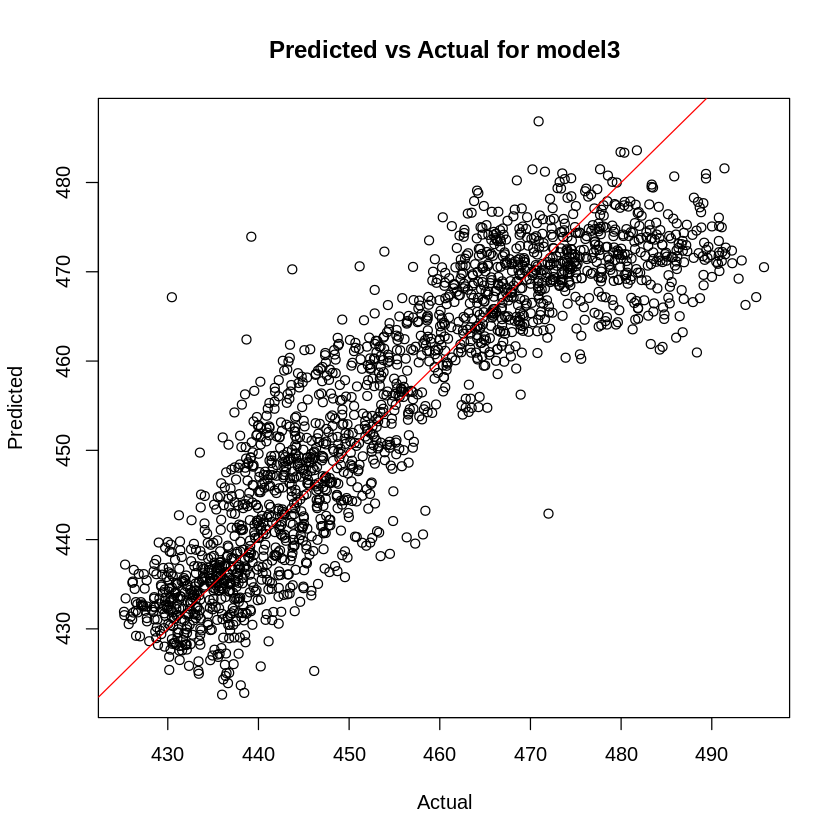

Model: model5 - Test MSE: 38.34142 


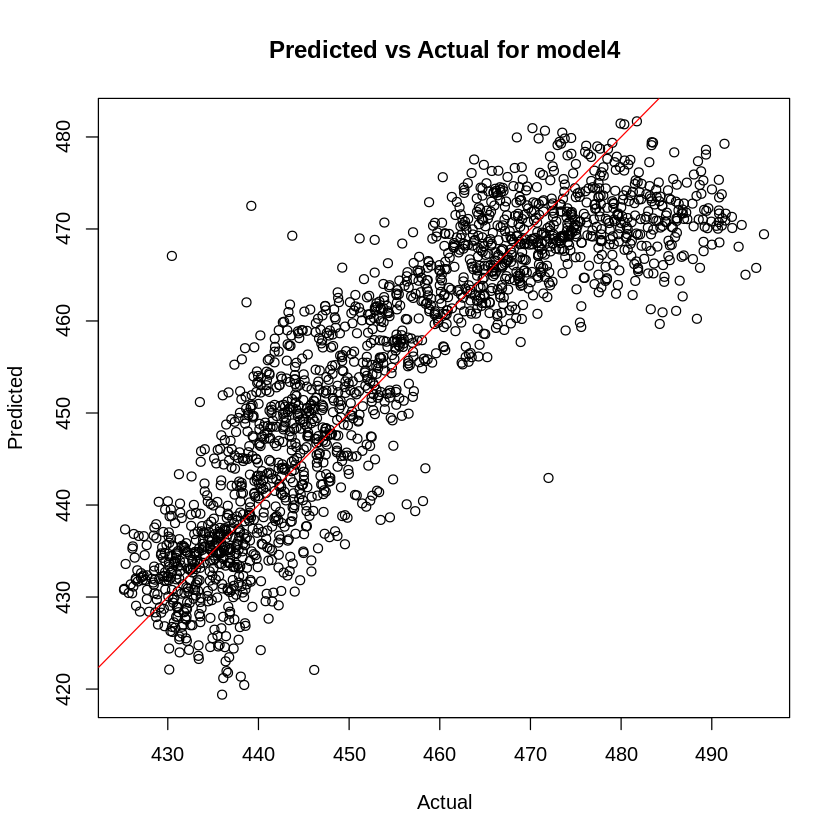

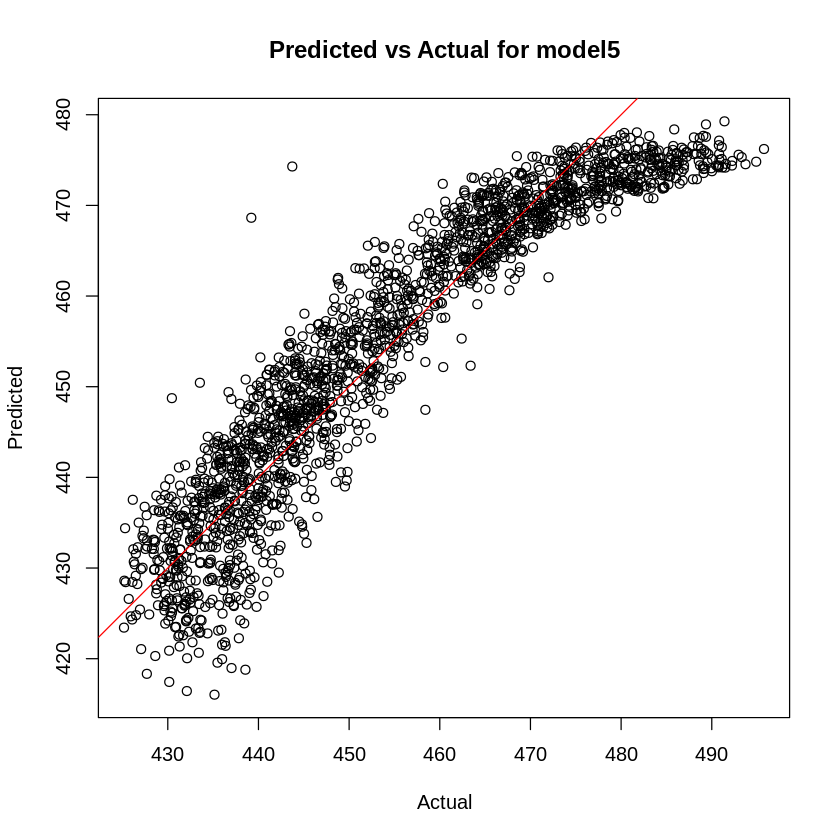

In [ ]:
set.seed(123)
train_indices <- sample(seq_len(nrow(data)), size = 0.8 * nrow(data))

train_data <- data[train_indices, ]
test_data <- data[-train_indices, ]

for (model_name in c("model1", "model2", "model3", "model4", "model5")) {

  # Build model matrix with engineered features
  X_train <- build_model_matrix(train_data, model_name)
  X_test <- build_model_matrix(test_data, model_name)

  y_train <- train_data$x2
  y_test <- test_data$x2

  # Scale predictors based on training set mean/sd
  means <- apply(X_train, 2, mean)
  sds <- apply(X_train, 2, sd)
  X_train_scaled <- scale(X_train, center = means, scale = sds)
  X_test_scaled <- scale(X_test, center = means, scale = sds)  # Use train mean/sd

  # Add intercept
  X_train_scaled <- cbind(1, X_train_scaled)
  colnames(X_train_scaled)[1] <- "(Intercept)"
  X_test_scaled <- cbind(1, X_test_scaled)
  colnames(X_test_scaled)[1] <- "(Intercept)"

  # Estimate parameters on train
  theta_hat <- solve(t(X_train_scaled) %*% X_train_scaled) %*% t(X_train_scaled) %*% y_train

  # Predict on test
  y_pred <- X_test_scaled %*% theta_hat

  # Calculate MSE
  mse <- mean((y_test - y_pred)^2)

  cat("Model:", model_name, "- Test MSE:", mse, "\n")

  # Optional plot
  plot(y_test, y_pred, main = paste("Predicted vs Actual for", model_name),
       xlab = "Actual", ylab = "Predicted")
  abline(a=0, b=1, col="red")
}


# Task 3


3.1: Identify Top 2 Parameters with Largest OLS Estimates

In [ ]:
# Set seed for reproducibility
set.seed(123)

# Split data into 80% train, 20% test
train_indices <- sample(seq_len(nrow(data)), size = 0.8 * nrow(data))
train_data <- data[train_indices, ]
test_data <- data[-train_indices, ]

# Build design matrix for model5
# model5 uses: x4, x1^2, x3^2
X_train <- data.frame(
  x4 = train_data$x4,
  x1_sq = train_data$x1^2,
  x3_sq = train_data$x3^2
)

# Response variable
y_train <- train_data$x2

# Standardize predictors using training set mean and sd
means <- apply(X_train, 2, mean)
sds <- apply(X_train, 2, sd)
X_train_scaled <- scale(X_train, center = means, scale = sds)

# Add intercept term
X_train_scaled <- cbind(1, X_train_scaled)
colnames(X_train_scaled)[1] <- "(Intercept)"

# Estimate coefficients using the normal equation
theta_hat <- solve(t(X_train_scaled) %*% X_train_scaled) %*% t(X_train_scaled) %*% y_train

# Display estimated parameters
theta_hat_named <- setNames(as.numeric(theta_hat), colnames(X_train_scaled))
print(round(theta_hat_named, 4))


(Intercept)          x4       x1_sq       x3_sq 
   454.3519      1.3087    -10.5537     -5.2035 


Number of accepted samples: 7745 


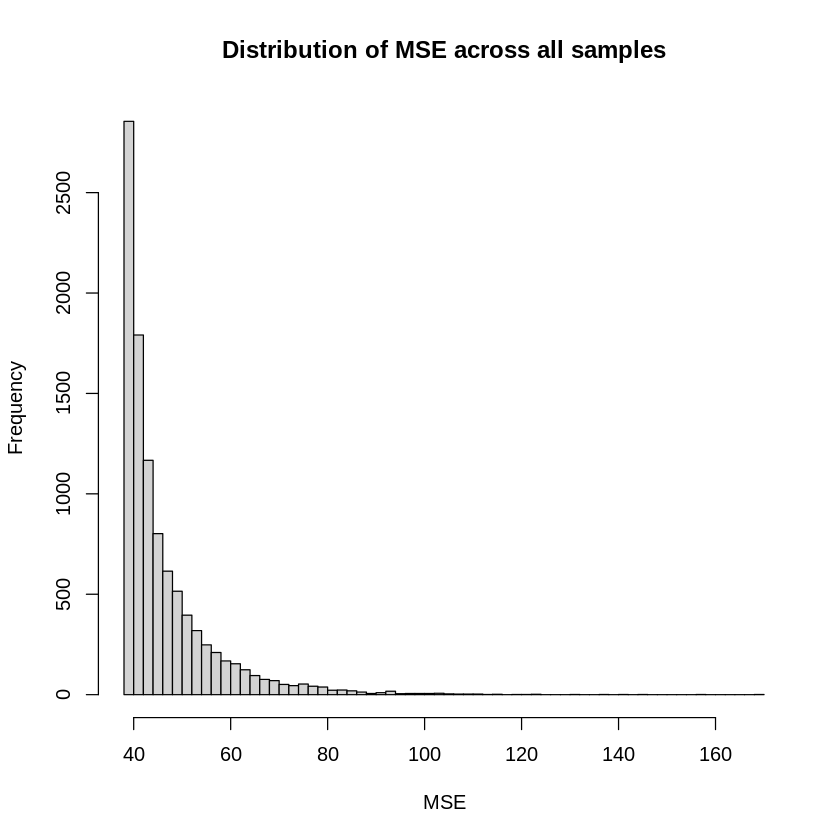

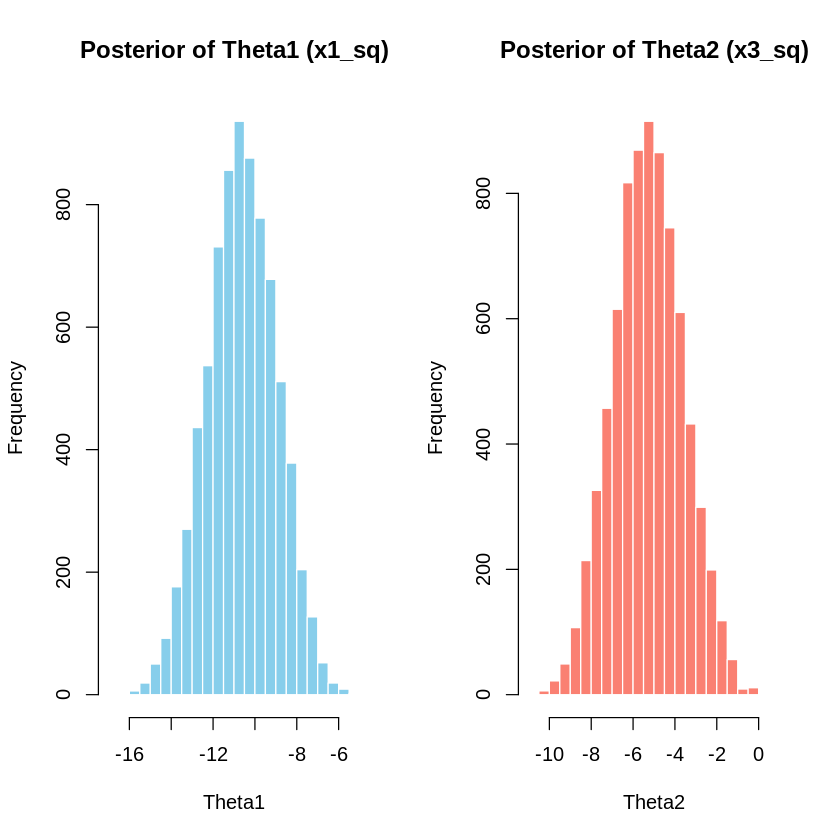

In [ ]:
set.seed(123)

# Prepare test predictors scaled with training means and sds
X_test <- data.frame(
  x4 = test_data$x4,
  x1_sq = test_data$x1^2,
  x3_sq = test_data$x3^2
)
X_test_scaled <- scale(X_test, center = means, scale = sds)
X_test_scaled <- cbind(1, X_test_scaled)
colnames(X_test_scaled)[1] <- "(Intercept)"

# True test response
y_test <- test_data$x2

# Fix intercept and x4 coefficients at estimated values
theta_fixed <- theta_hat_named[c("(Intercept)", "x4")]

# Number of samples
N <- 10000

# Sample from priors with narrower sd to avoid extreme values
theta1_samples <- rnorm(N, mean = theta_hat_named["x1_sq"], sd = 2)
theta2_samples <- rnorm(N, mean = theta_hat_named["x3_sq"], sd = 2)

# Storage for MSE and accepted samples
mse_vec <- numeric(N)
accepted_theta1 <- numeric()
accepted_theta2 <- numeric()

# Set acceptance threshold (tune this)
epsilon <- 50

for (i in 1:N) {
  theta_i <- c(
    theta_fixed["(Intercept)"],
    theta_fixed["x4"],
    theta1_samples[i],
    theta2_samples[i]
  )
  y_pred <- as.numeric(X_test_scaled %*% theta_i)
  mse <- mean((y_test - y_pred)^2)
  mse_vec[i] <- mse

  if (mse < epsilon) {
    accepted_theta1 <- c(accepted_theta1, theta1_samples[i])
    accepted_theta2 <- c(accepted_theta2, theta2_samples[i])
  }
}

cat("Number of accepted samples:", length(accepted_theta1), "\n")

# Diagnostic histogram of all MSEs
hist(mse_vec, breaks = 50, main = "Distribution of MSE across all samples", xlab = "MSE", col = "lightgray")

# Plot posterior histograms only if there are accepted samples
if (length(accepted_theta1) > 0) {
  par(mfrow = c(1, 2))
  hist(accepted_theta1, breaks = 30, main = "Posterior of Theta1 (x1_sq)",
       xlab = "Theta1", col = "skyblue", border = "white")
  hist(accepted_theta2, breaks = 30, main = "Posterior of Theta2 (x3_sq)",
       xlab = "Theta2", col = "salmon", border = "white")
  par(mfrow = c(1, 1))
} else {
  cat("No samples accepted at epsilon =", epsilon, "\n")
}


In [ ]:
if (length(accepted_theta1) > 0 && length(accepted_theta2) > 0) {

  # Posterior mean estimates
  post_mean_theta1 <- mean(accepted_theta1)
  post_mean_theta2 <- mean(accepted_theta2)

  # 95% credible intervals using quantiles
  post_ci_theta1 <- quantile(accepted_theta1, probs = c(0.025, 0.975))
  post_ci_theta2 <- quantile(accepted_theta2, probs = c(0.025, 0.975))

  # Print summary
  cat("Posterior summary for Theta1 (x1_sq):\n")
  cat("Mean:", round(post_mean_theta1, 4), "\n")
  cat("95% Credible Interval:", round(post_ci_theta1[1], 4), "-", round(post_ci_theta1[2], 4), "\n\n")

  cat("Posterior summary for Theta2 (x3_sq):\n")
  cat("Mean:", round(post_mean_theta2, 4), "\n")
  cat("95% Credible Interval:", round(post_ci_theta2[1], 4), "-", round(post_ci_theta2[2], 4), "\n\n")

} else {
  cat("No accepted samples to summarize. Try increasing epsilon or adjusting priors.\n")
}


Posterior summary for Theta1 (x1_sq):
Mean: -10.6306 
95% Credible Interval: -13.9036 - -7.4593 

Posterior summary for Theta2 (x3_sq):
Mean: -5.2776 
95% Credible Interval: -8.4867 - -1.9949 



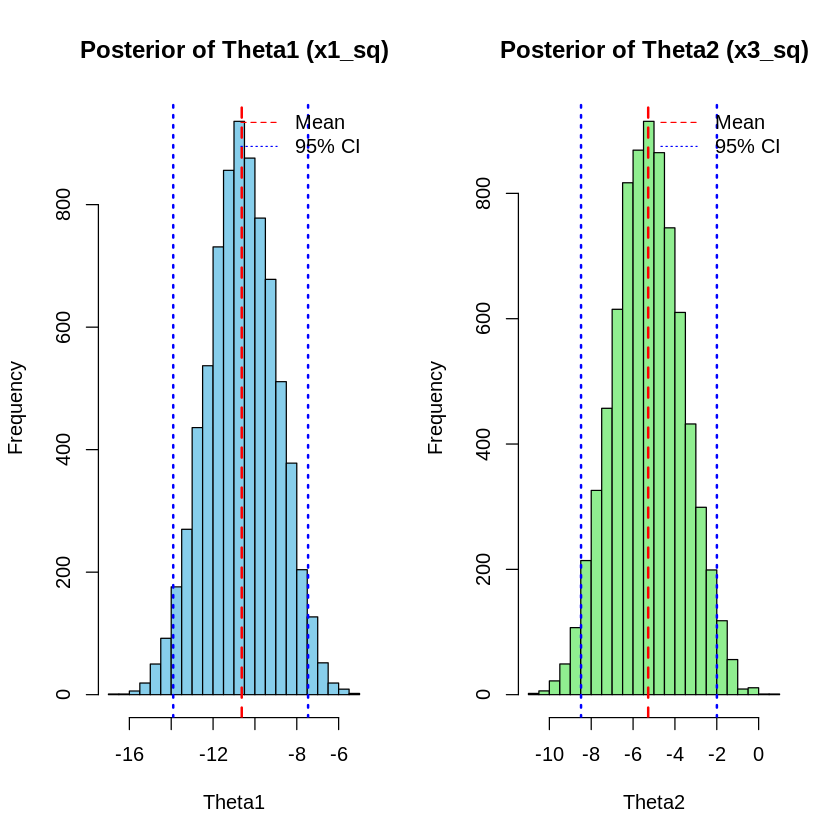

In [ ]:
# Compute summary statistics for accepted samples
summary_theta1 <- quantile(accepted_theta1, probs = c(0.025, 0.5, 0.975))
summary_theta2 <- quantile(accepted_theta2, probs = c(0.025, 0.5, 0.975))

mean_theta1 <- mean(accepted_theta1)
mean_theta2 <- mean(accepted_theta2)

# Plot histograms with vertical lines for summaries
par(mfrow = c(1, 2))

hist(accepted_theta1, breaks = 30, col = "skyblue", main = "Posterior of Theta1 (x1_sq)",
     xlab = "Theta1")
abline(v = mean_theta1, col = "red", lwd = 2, lty = 2)
abline(v = summary_theta1[c(1,3)], col = "blue", lwd = 2, lty = 3)
legend("topright", legend = c("Mean", "95% CI"), col = c("red", "blue"),
       lty = c(2, 3), bty = "n")

hist(accepted_theta2, breaks = 30, col = "lightgreen", main = "Posterior of Theta2 (x3_sq)",
     xlab = "Theta2")
abline(v = mean_theta2, col = "red", lwd = 2, lty = 2)
abline(v = summary_theta2[c(1,3)], col = "blue", lwd = 2, lty = 3)
legend("topright", legend = c("Mean", "95% CI"), col = c("red", "blue"),
       lty = c(2, 3), bty = "n")


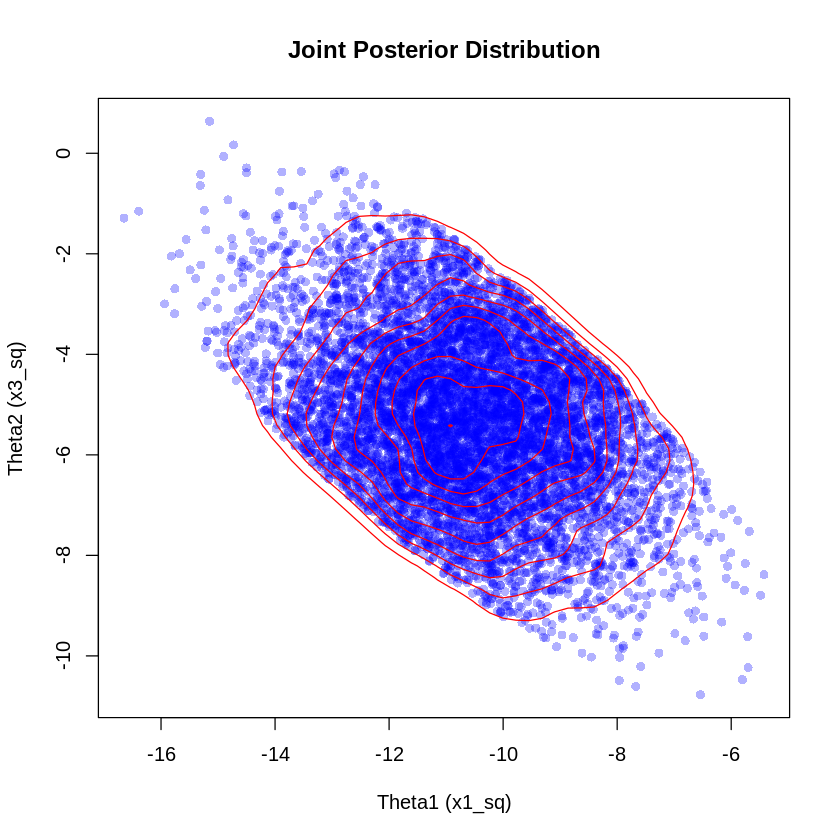

In [ ]:
# Scatter plot of joint posterior samples
plot(accepted_theta1, accepted_theta2,
     xlab = "Theta1 (x1_sq)", ylab = "Theta2 (x3_sq)",
     main = "Joint Posterior Distribution",
     pch = 16, col = rgb(0, 0, 1, 0.3))  # semi-transparent blue points

# Optional: add a smooth 2D density contour
library(MASS)  # for kde2d
kde <- kde2d(accepted_theta1, accepted_theta2, n = 50)
contour(kde$x, kde$y, kde$z, add = TRUE, drawlabels = FALSE, col = "red")
